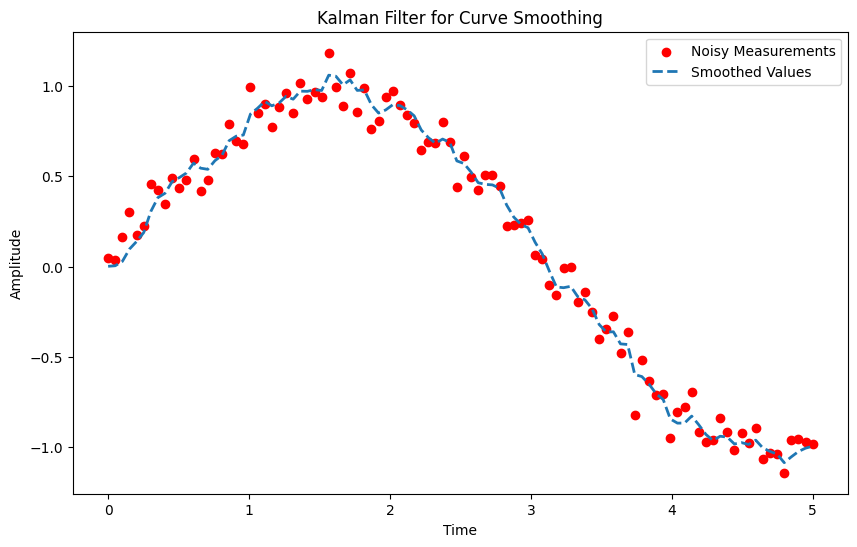

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

# Generate a noisy sine wave as the observed data
np.random.seed(42)
t = np.linspace(0, 5, 100)
true_values = np.sin(t)
noisy_values = true_values + 0.1 * np.random.randn(len(t))

# Initialize Kalman filter parameters
kf = KalmanFilter(dim_x=2, dim_z=1)

# State transition matrix
kf.F = np.array([[1, 1],
                 [0, 1]])

# Measurement matrix
kf.H = np.array([[1, 0]])

# Process noise covariance
kf.Q = np.array([[1e-3, 0],
                 [0, 1e-3]])

# Measurement noise covariance
kf.R = 0.1

# Initial state
kf.x = np.array([0, 0])

# Initial state covariance
kf.P *= 1e-3

# Apply the Kalman filter to smooth the noisy data
smoothed_values = []
for measurement in noisy_values:
    kf.predict()
    kf.update(measurement)
    smoothed_values.append(kf.x[0])

# Plot the results
plt.figure(figsize=(10, 6))
# plt.plot(t, true_values, label='True Values', linewidth=2)
plt.scatter(t, noisy_values, label='Noisy Measurements', color='red')
plt.plot(t, smoothed_values, label='Smoothed Values', linestyle='dashed', linewidth=2)
plt.title('Kalman Filter for Curve Smoothing')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


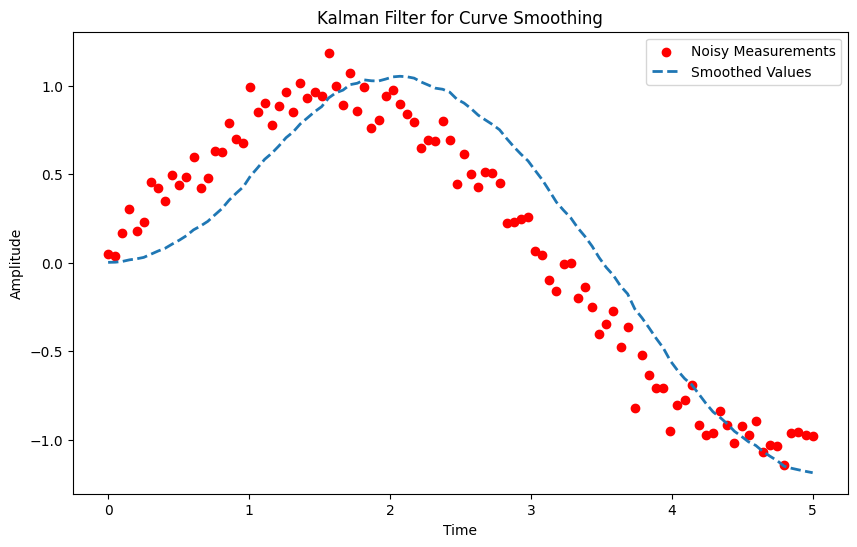

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

# Generate a noisy sine wave as the observed data
np.random.seed(42)
t = np.linspace(0, 5, 100)
true_values = np.sin(t)
noisy_values = true_values + 0.1 * np.random.randn(len(t))

# Initialize Kalman filter parameters
kf = KalmanFilter(dim_x=2, dim_z=1)

kf.F = np.array([[1, 0.1],
                 [0, 1]])
kf.H = np.array([[1, 0.1]])


# Process noise covariance
kf.Q = np.array([[1e-3, 0],
                 [0, 1e-3]])

# Measurement noise covariance
kf.R = 0.5


# Initial state
kf.x = np.array([0, 0])

# Initial state covariance
kf.P *= 1e-2


# Apply the Kalman filter to smooth the noisy data
smoothed_values = []
for measurement in noisy_values:
    kf.predict()
    kf.update(measurement)
    smoothed_values.append(kf.x[0])

# Plot the results
plt.figure(figsize=(10, 6))
# plt.plot(t, true_values, label='True Values', linewidth=2)
plt.scatter(t, noisy_values, label='Noisy Measurements', color='red')
plt.plot(t, smoothed_values, label='Smoothed Values', linestyle='dashed', linewidth=2)
plt.title('Kalman Filter for Curve Smoothing')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [11]:
def kalman_filter(x,y):
        # Initialize Kalman filter parameters
    kf = KalmanFilter(dim_x=2, dim_z=1)
    kf.F = np.array([[1, 0.1],
                    [0, 1]])
    kf.H = np.array([[1, 0.1]])
    # Process noise covariance
    kf.Q = np.array([[1e-3, 0],
                    [0, 1e-3]])
    # Measurement noise covariance
    kf.R = 0.5
    # Initial state
    kf.x = np.array([0, 0])
    # Initial state covariance
    kf.P *= 1e-2
    # Apply the Kalman filter to smooth the noisy data
    smoothed_values = []
    for measurement in y:
        kf.predict()
        kf.update(measurement)
        smoothed_values.append(kf.x[0])
    return x,smoothed_values

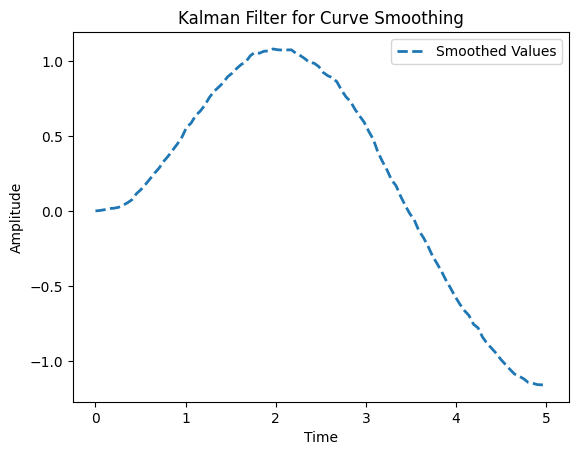

In [12]:
t = np.linspace(0, 5, 100)
true_values = np.sin(t)
noisy_values = true_values + 0.1 * np.random.randn(len(t))

k_x,k_y = kalman_filter(t,noisy_values)
plt.plot(k_x, k_y, label='Smoothed Values', linestyle='dashed', linewidth=2)
plt.title('Kalman Filter for Curve Smoothing')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [10]:
z = kalman_filter(t,noisy_values)
print(len(z))

100
